In [35]:
from collections import Counter
from os import path
from typing import List

from pandas import read_csv, DataFrame
import seaborn as sns

In [36]:
def informations_qualitatives_data(columns : List[str], dataframe: DataFrame) -> None:
    for column_name in columns:
        counter = Counter(dataframe[column_name])
        len_values = len(dataframe[column_name].unique())
        print(f" {column_name} : {len_values} values with \n {counter}")
        
    return None 

In [37]:
dataframe = read_csv(path.join("..", 'data/raw','carData.csv'))
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [38]:
dataframe.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Dataset's informations
We have a dataset of **301 observations** with **9 features** about cars. Each observation is information about a specific car model.  
We have 5 **numericals** features and 4 **qualitatives** features (3 are **categoricals**).  
It is a short dataframe but there isn't any null values.

In [39]:
dataframe.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


- compare selling & present price  

/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Count'>

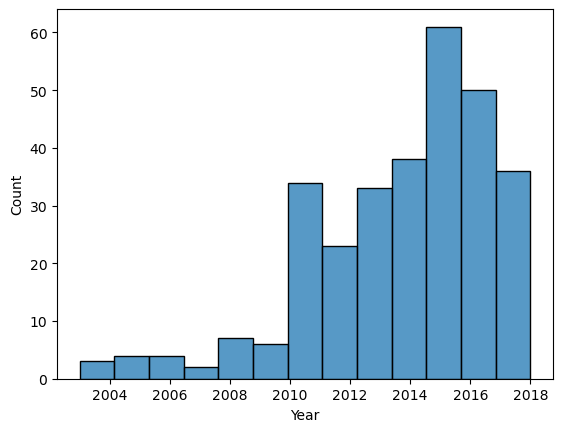

In [40]:
sns.histplot(data=dataframe, x="Year")

/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Owner', ylabel='Count'>

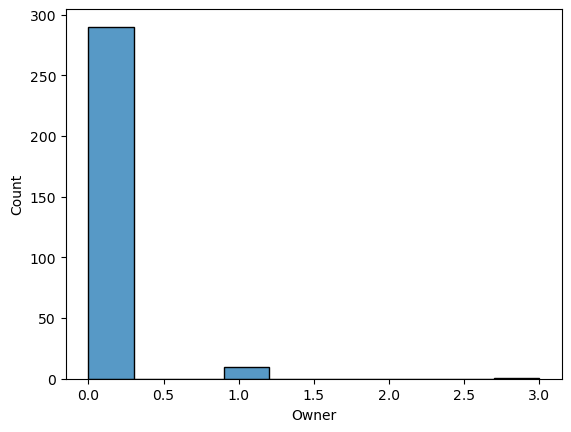

In [41]:
sns.histplot(data=dataframe, x="Owner")

In [42]:
dataframe[dataframe["Selling_Price"] >= dataframe["Present_Price"]].count()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Describe quantitatives data  
The dataset is about the 301 cars models between 2003 & 2018. 50% of them were created between 2003 & 2014, the other half between 2014 & 2018.  
The selling price start at 0.1 and finish at 35, with the median of the prices at 3.6.  
In opposition, the present price is always bigger, because it start at 0.3 and finish at 92 with the median of the prices at 6.4.  
The kms driven go from 500 km to 500 000 km with half more than 32 000 km.  
75% of the cars have 0 owner and it can go to 3 owners maximum.

/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Car_Name', ylabel='Count'>

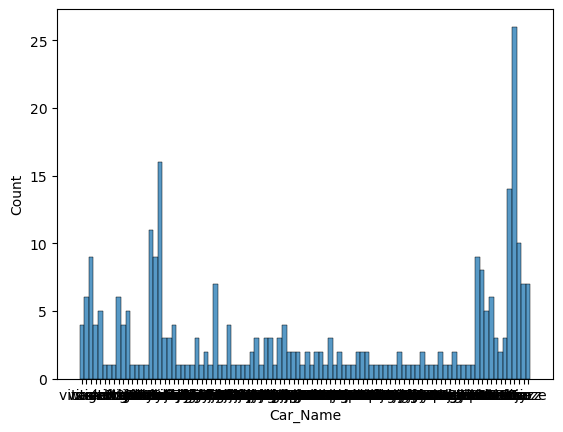

In [50]:
sns.histplot(data=dataframe, x="Car_Name")

In [43]:
categorical_columns = ["Car_Name", "Fuel_Type", "Seller_Type", "Transmission"]
informations_qualitatives_data(columns=categorical_columns, dataframe=dataframe)

 Car_Name : 98 values with 
 Counter({'city': 26, 'corolla altis': 16, 'verna': 14, 'fortuner': 11, 'brio': 10, 'ciaz': 9, 'innova': 9, 'i20': 9, 'grand i10': 8, 'Royal Enfield Classic 350': 7, 'amaze': 7, 'jazz': 7, 'sx4': 6, 'ertiga': 6, 'eon': 6, 'swift': 5, 'alto k10': 5, 'i10': 5, 'ritz': 4, 'wagon r': 4, 'dzire': 4, 'etios liva': 4, 'Royal Enfield Thunder 350': 4, 'Bajaj Pulsar 150': 4, 'etios cross': 3, 'etios g': 3, 'Royal Enfield Thunder 500': 3, 'Bajaj Avenger 220': 3, 'Honda CB Hornet 160R': 3, 'Yamaha FZ S V 2.0': 3, 'TVS Apache RTR 160': 3, 'Bajaj Pulsar NS 200': 3, 'xcent': 3, 'creta': 3, 'KTM RC200': 2, 'Royal Enfield Classic 500': 2, 'Honda CBR 150': 2, 'Hero Extreme': 2, 'Bajaj Avenger 220 dtsi': 2, 'Yamaha FZ  v 2.0': 2, 'Bajaj Pulsar 220 F': 2, 'TVS Apache RTR 180': 2, 'Honda Activa 4G': 2, 'Hero Splender iSmart': 2, 'Activa 3g': 2, 'Hero Passion Pro': 2, 'Honda Karizma': 2, 'Honda CB Shine': 2, 'Honda CB twister': 2, 'Bajaj Discover 125': 2, 'elantra': 2, 'vitara br

# Describe qualitatives data
The dataset is about the 301 cars with :
98 cars name with often between 1 to 6 cars by models (they are some exceptions).  
3 Fuel type, with 4/5 of Petrol, 1/5 of Diesel & 2 cars of CNG?  
2 seller type, with 2/3 Dealer and 1/3 Individual.  
And finally 2 transmissions, with a bit more than 5/6 Manual and a little less than 1/5 Automatic.  

/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


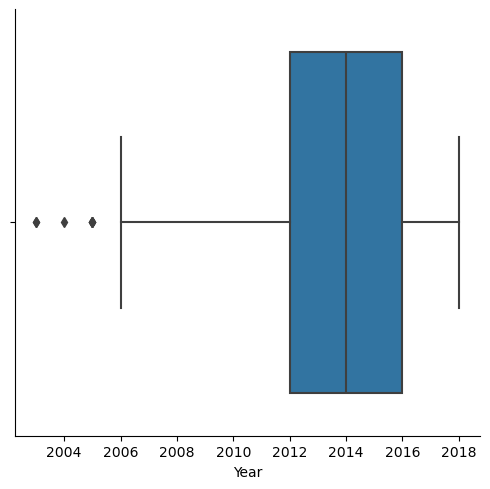

In [46]:
sns.catplot(data=dataframe, x="Year", kind="box")